## THỰC HÀNH 4: PHÂN LỚP CƠ BẢN
1. Đọc và tìm hiểu cấu trúc của dữ liệu.

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, 2:]
Y = iris.target

In [2]:
X.shape

(150, 2)

2. Phân chia dữ liệu

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

3. Huấn luyện mô hình và dự đoán

In [4]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [5]:
Y_pred = model.predict(X_test)

4. Đánh giá khả năng dự đoán của mô hình

In [6]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)*100

93.33333333333333

# 5. Bài tập

**Bài 1: Hãy thống kê số lượng nhãn (label) trên tập training và tập test vừa chia. Vẽ biểu đồ phân bố nhãn** 

<Axes: >

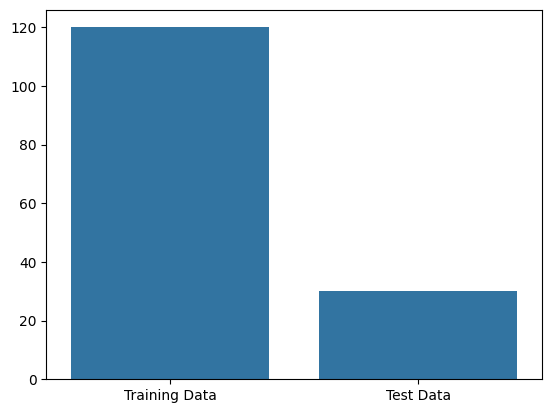

In [7]:
from seaborn import barplot
barplot(x=['Training Data', 'Test Data'], y=[X_train.shape[0], X_test.shape[0]])

**Bài 2: Thực hiện huấn luyện mô hình Logistic Regression trên bộ dữ liệu**

In [8]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)*100

93.33333333333333

**Bài 3: Thực hiện huấn luyện mô hình K láng giềng gần nhất (KNN) trên bộ dữ liệu, sau đó so sánh độ chính xác (Accuracy) với mô hình LogisticRegression.**

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)
accuracy_score(Y_test, Y_pred_knn)*100  

93.33333333333333

Nhận xét: độ chính xác của 2 mô hình là tương đương nhau.

**Bài 4: Đánh giá 2 mô hình vừa xây dựng trên 3 độ đo sau: precision_score, recall_score và f1_score sử dụng macro average.**

- Logistic Regression:

In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision score:" ,precision_score(Y_test, Y_pred, average= "macro")*100)
print("Recall score:" ,recall_score(Y_test, Y_pred, average= "macro")*100)
print("F1 score:" ,f1_score(Y_test, Y_pred, average= "macro")*100)

Precision score: 90.74074074074075
Recall score: 90.74074074074075
F1 score: 90.74074074074075


- KNN

In [11]:
print("Precision score:" ,precision_score(Y_test, Y_pred_knn, average= "macro")*100)
print("Recall score:" ,recall_score(Y_test, Y_pred_knn, average= "macro")*100)
print("F1 score:" ,f1_score(Y_test, Y_pred_knn, average= "macro")*100)

Precision score: 90.74074074074075
Recall score: 90.74074074074075
F1 score: 90.74074074074075


**Bài 5: Hãy sử dụng chiến lược tinh chỉnh tham số GridSearchCV để tìm ra bộ tham số tốt nhất cho mô hình Logistic Regression. So sánh kết quả với mô hình gốc.**

In [12]:
from sklearn.model_selection import GridSearchCV
#grid search for logistic regression
param_grid = [
    {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.1, 0.5, 1, 5, 10],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 500, 1000, 5000]}
]
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, Y_train)
grid_search.best_params_

d:\Application\Programming\python\py3116\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Application\Programming\python\py3116\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Application\Programming\python\py3116\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Application\Programming\python\py3116\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Application\Programming\python\py3116\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Application\Programming\pyt

{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [13]:
log_tune = LogisticRegression(C= 0.5, max_iter= 100, penalty= 'l2', solver= 'newton-cg')
log_tune.fit(X_train, Y_train)
Y_pred_log_tune = log_tune.predict(X_test)
accuracy_score(Y_test, Y_pred_log_tune)*100

93.33333333333333

Nhận xét: Độ chính xác tốt hơn mô hình gốc

**Bài 6: Hãy thực hiện các bước tương tự gồm: đọc dữ liệu, thống kê số nhãn, số thuộc tính trong bộ dữ liệu, chia thành tập train và tập test, và huấn luyện mô hình với bộ dữ liệu Breast Cancer Wisconsin.**

In [14]:
#import dataset
import pandas as pd
bai6 = pd.read_csv("data.csv")

In [15]:
drop_cols = ['Unnamed: 32','id']
bai6 = bai6.drop(drop_cols, axis=1)

In [16]:
bai6['diagnosis'] = bai6['diagnosis'].map({'M':1,'B':0})

In [17]:
X_bai6 = bai6.drop(['diagnosis'], axis = 1)
y_bai6 = bai6['diagnosis']
model_bai6 = LogisticRegression()

In [18]:
X_train_bai6, X_test_bai6, Y_train_bai6, Y_test_bai6 = train_test_split(X_bai6, y_bai6, test_size=0.2)

In [19]:
model_bai6.fit(X_train_bai6, Y_train_bai6)
y_pred_brcw = model_bai6.predict(X_test_bai6)
print("Accuracy score: ", accuracy_score(Y_test_bai6, y_pred_brcw)*100)
print("Precision score:" ,precision_score(Y_test_bai6, y_pred_brcw, average= "macro")*100)
print("Recall score:" ,recall_score(Y_test_bai6, y_pred_brcw, average= "macro")*100)
print("F1 score:" ,f1_score(Y_test_bai6, y_pred_brcw, average= "macro")*100)

Accuracy score:  95.6140350877193
Precision score: 96.52777777777779
Recall score: 94.68085106382979
F1 score: 95.39245008487592


d:\Application\Programming\python\py3116\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
